# Trabajo práctico #2
## Integrantes:
Alex Rodriguez, 20250587    
Isabel Prado, 20250510   
Celeste Castañeda, 20250363  
Kevin Morales, 20250728   
Leonel Contreras, 20170129  

## Simulación de caminos aleatorios

Consideremos primero un simple paseo aleatorio que comienza en 0 con pasos de 1 y -1 que ocurren con igual probabilidad. 

- Codifique un recorrido (path) de 1.000 pasos utilizando un `bucle for` y luego utilizando `arreglos de datos` (o vectores).

- Calcule el valor máximo y mínimo alcanzado en el recorrido, el valor promedio y el desvío estándar. Además calcule cuantos pasos le llevó al proceso tener una distancia de 10 con respecto al valor inicial en cualquier dirección.

In [1]:
# definimos una funcion que, equiprobablemente, retorna 1 0 -1
# importamos random
import random
# definimos la funcion
def random_step():
    # generamos un numero aleatorio entre 0 y 1, si es menor a 0.5 retornamos 1; retornamos -1 en cualquier otro caso
    return 1 if random.random() < 0.5 else -1

In [45]:
# importamos array
import array
# importamos pyplot
import matplotlib.pyplot as plt
# importamos el modulo statistics
import statistics
# definimos la funcion que guarda todos los pasos en un array, definiendo asi el paseo aleatorio
def random_path(grafica=1):
    # inicializamos el array con un valor cero
    pasos = array.array('i', [0])
    # esta variable indica el step en el que se llego a una distancia de 10 respecto al origen
    paso = 0
    # definimos un flag para cuando se halla llegado a una distancia de 10 respecto al origen
    alcanzado = False
    # iniciamos el ciclo for
    for i in range(1000):
        # sumamos al paso previo, el valor aleatorio dado por nuestra funcion
        pasos.append(pasos[-1] + random_step())
        # definimos una variable que mide la distancia respecto al origen 
        distancia_actual = abs(pasos[-1])
        # en el ciclo if, guardamos el paso hasta alcanzar la distancia requerrida
        if not alcanzado and distancia_actual >= 10:
            # guardamos el paso en que se alcanzó
            paso = i  
            # cambiamos el valor del flag
            alcanzado = True 

    # calculamos media, desv est, max y min en el paseo
    # nos limitamos a dos decimales
    media = round(statistics.mean(pasos),2)
    stdev = round(statistics.stdev(pasos),2)
    maximo = round(max(pasos),2)
    minimo = round(min(pasos),2)
    
    if grafica==1:
        # ploteamos los pasos
        plt.plot(pasos)
        # ploteamos una vertical en el paso donde se alcanza la distancia de 10 respecto al origen
        plt.axvline(x=paso, color='black', linestyle='-', linewidth=1, label=f'Paso = {paso}')
        # graficamos la media
        plt.axhline(y=media, color='red', linestyle='--', linewidth=1, label=f'Media = {media}')
        # graficamos dos bandas a distancia de 10 respecto del origen para visualizar cuando se alcanza esta distancia
        plt.axhline(y=10, color='green', linestyle='-', linewidth=1)
        plt.axhline(y=-10, color='green', linestyle='-', linewidth=1)
        plt.xlabel('Número de pasos')
        plt.ylabel('Posición acumulada')
        plt.title('Camino Aleatorio')
        plt.show()
    # retornamos el array con la trayectoria y los datos estadisticos
    return pasos, media, stdev, maximo, minimo, paso
        

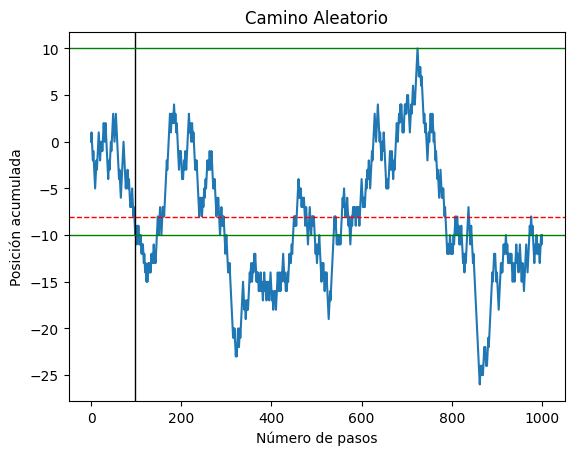

In [46]:
pasos, media, stdev, maximo, minimo, paso = random_path()

In [47]:
print(media, stdev, maximo, minimo, paso)

-8.05 6.95 10 -26 97
